In [20]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import scipy.io as sio
import xarray as xr

from mapper_functions import plot_global_tight

In [21]:
# Load the .npz file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_fp_precip_OmF_ts.npz')

# Get the data from the .npz file
dates_list = data['dates_list']
obs_obs_mean_list = data['obs_obs_mean_list']
obs_fcst_mean_list = data['obs_fcst_mean_list']
obs_ana_mean_list = data['obs_ana_mean_list']
omf_mean_list = data['omf_mean_list']
oma_mean_list = data['oma_mean_list']
omf_max_list = data['omf_max_list']
omf_std_list = data['omf_std_list']
oma_std_list = data['oma_std_list']

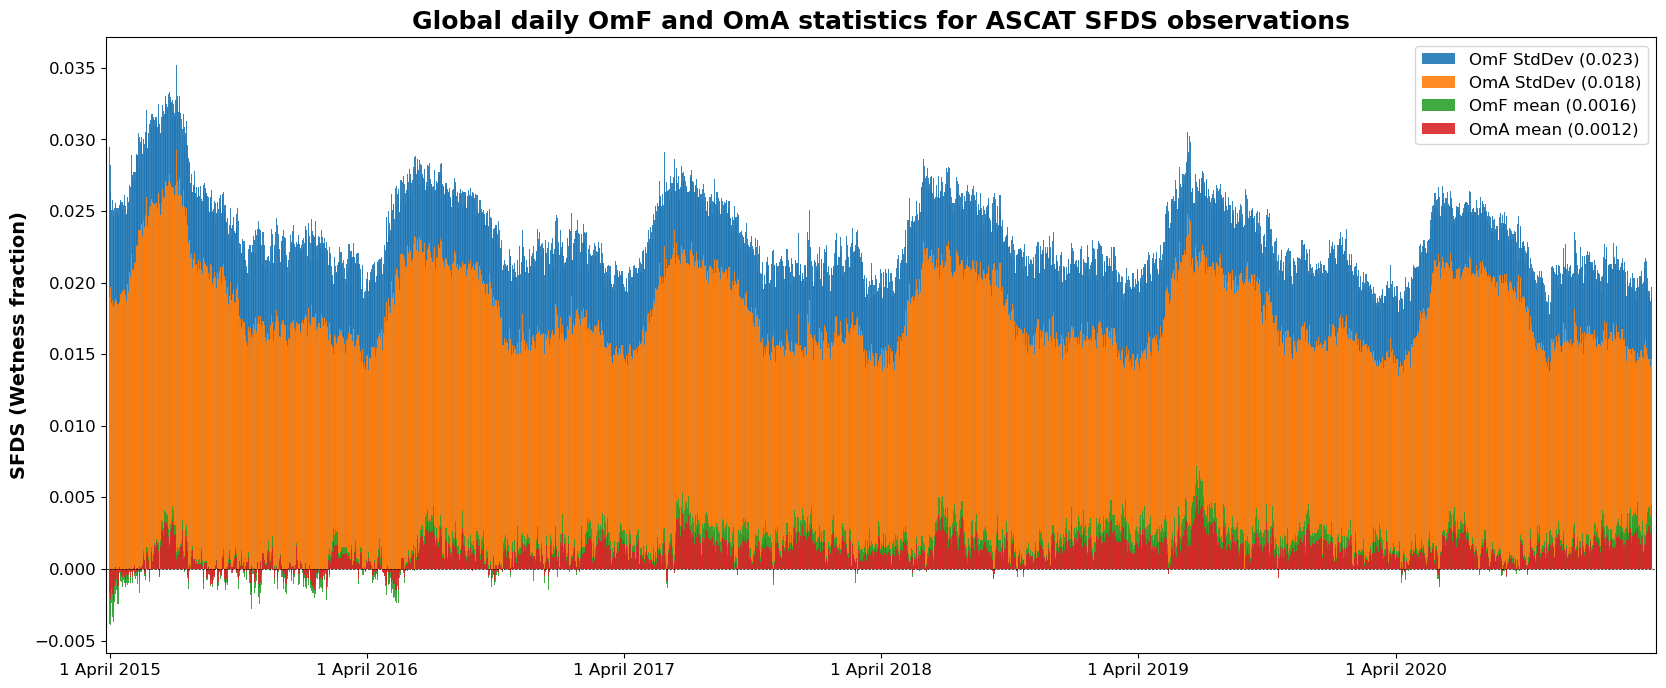

In [33]:
# Create a bar plot of the mean values

oma_std_list_fixed = np.copy(oma_std_list)
oma_std_list_fixed[np.isnan(oma_std_list_fixed)] = 0.02

omf_std_list_fixed = np.copy(omf_std_list)
omf_std_list_fixed[np.isnan(omf_std_list_fixed)] = 0.024

plt.figure(figsize=(20,8))
bar_width = 1.5
opacity = 0.9
index = np.arange(len(dates_list))

# Create a bar plot
plt.bar(index, omf_std_list_fixed    label=f'OmF StdDev ({np.nanmean(omf_std_list):.3f})')
plt.bar(index, oma_std_list_fixed, bar_width, alpha=opacity, label=f'OmA StdDev ({np.nanmean(oma_std_list):.3f})')
plt.bar(index, omf_mean_list, bar_width, alpha=opacity, label=f'OmF mean ({np.nanmean(omf_mean_list):.4f})')
plt.bar(index, oma_mean_list, bar_width, alpha=opacity, label=f'OmA mean ({np.nanmean(oma_mean_list):.4f})')



plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('0401')]
xtick_indices = np.where(np.isin(dates_list, xticks))[0]
xticks2 = ['1 April 2015', '1 April 2016', '1 April 2017', '1 April 2018', '1 April 2019', '1 April 2020']
plt.xticks(xtick_indices, xticks2, fontsize=12)
plt.yticks(fontsize=12)

# Adjust x-axis limits
plt.xlim(-5, len(dates_list) + 5)

# Add a y label
plt.ylabel('SFDS (Wetness fraction)', weight='bold', fontsize=14)

plt.legend(fontsize=12)

# Add a title
plt.title('Global daily OmF and OmA statistics for ASCAT SFDS observations', weight='bold', fontsize=18)

# Save the figure as a PNG file
plt.savefig('OmF_mean_ts.png', bbox_inches='tight')

plt.show()

['unique_tilenum', 'num_obs', 'mean_obs_obs', 'mean_obs_fcst', 'mean_obs_ana', 'mean_obs_minus_fcst', 'mean_obs_minus_ana', 'std_obs_minus_fcst', 'std_obs_minus_ana', 'lon_tilenum', 'lat_tilenum']
 Saving figure as ASC_FP: Number of ASCAT Obs Assimilated.png 



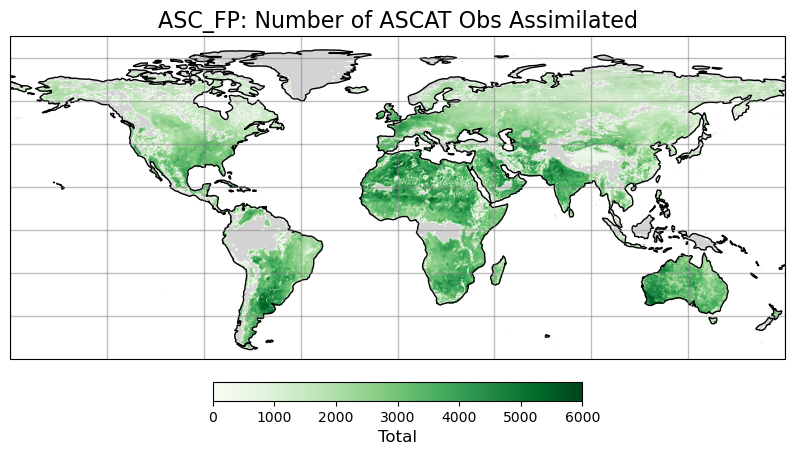

 Saving figure as ASC_FP: StdDev of OmF (SFDS).png 



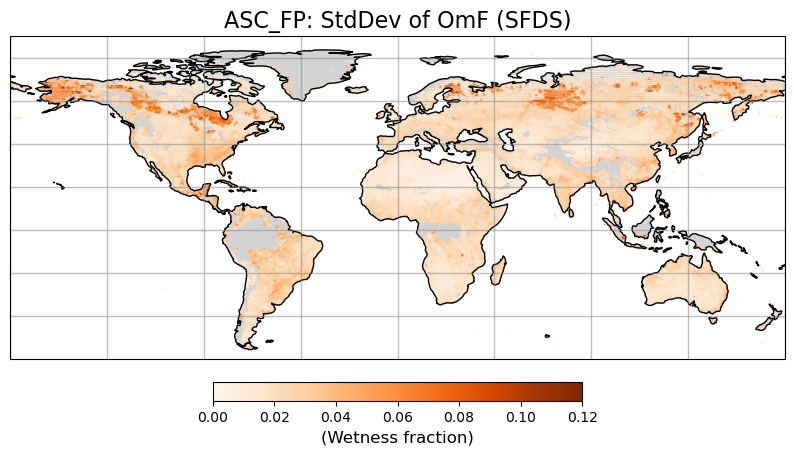

 Saving figure as ASC_FP: StdDev of OmA (SFDS).png 



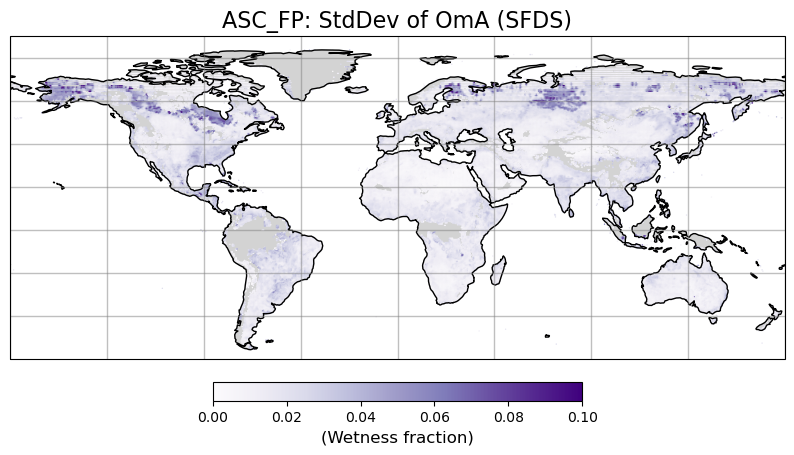

In [4]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_fp_precip_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data.files)

unique_tilenum_fp = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum_fp)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst_fp = data['std_obs_minus_fcst']
std_obs_minus_ana_fp = data['std_obs_minus_ana']


obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

obarray[:, 0] = num_obs    
plot_global_tight(obarray,True,'ASC_FP: Number of ASCAT Obs Assimilated','Total', 0, 6000, cmap='Greens')

obarray[:, 0] = std_obs_minus_fcst_fp    
plot_global_tight(obarray,True,'ASC_FP: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.12, cmap='Oranges')

obarray[:, 0] = std_obs_minus_ana_fp    
plot_global_tight(obarray,True,'ASC_FP: StdDev of OmA (SFDS)','(Wetness fraction)', 0, 0.1, cmap='Purples')

 Saving figure as ASC_FP: StdDev of surface SM increment.png 



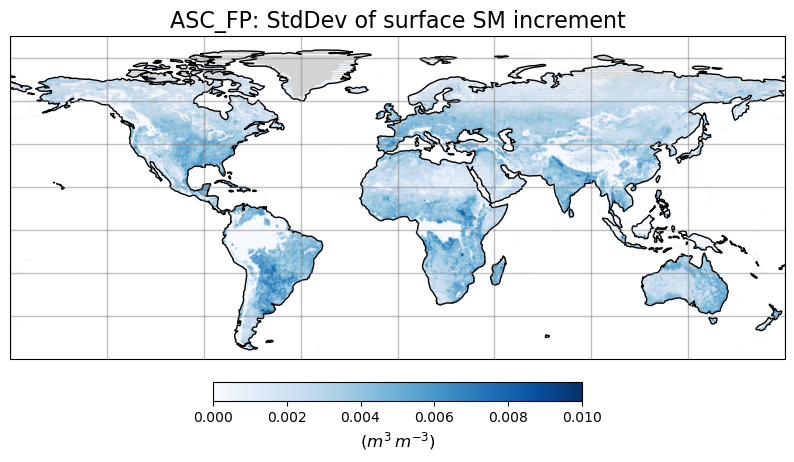

 Saving figure as ASC_FP: StdDev of rootzone SM increment.png 



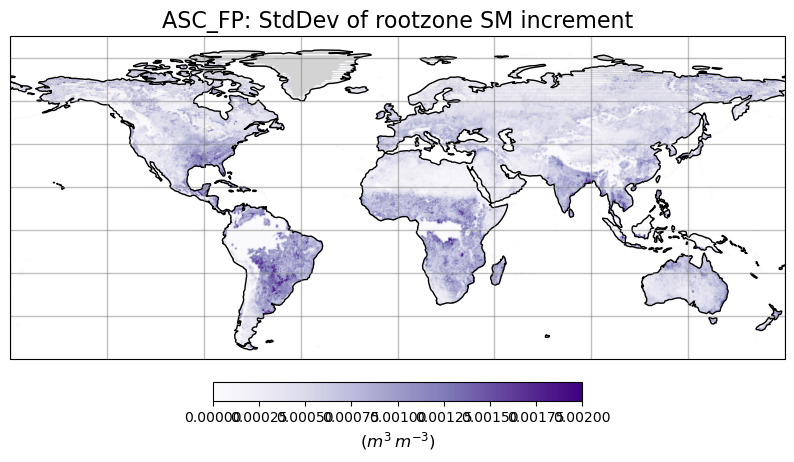

In [5]:
ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_fp_precip_increment_stats.npz' , allow_pickle=True)

std_sfmc_increment_fp = data['std_sfmc_increment']
std_rzmc_increment_fp = data['std_rzmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment_fp
    
plot_global_tight(obarray,True,'ASC_FP: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.01, cmap='Blues')

obarray[:, 0] = std_rzmc_increment_fp

plot_global_tight(obarray,True,'ASC_FP: StdDev of rootzone SM increment','($m^3 \, m^{-3}$)', 0, 0.002, cmap='Purples')

 Saving figure as ASC_FP minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R).png 



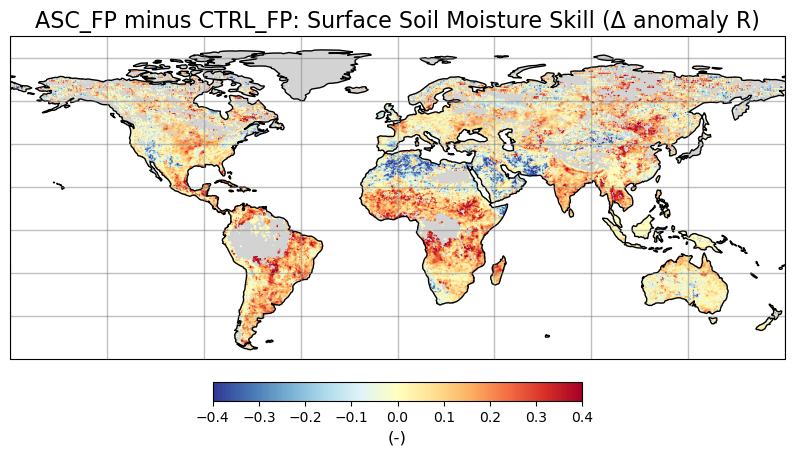

Mean:0.06254884339896168


In [6]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_FPprcp_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'ASC_FP minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

print("Mean:" + str(np.nanmean(Rdiff_vector)))

 Saving figure as CTRL_IM minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R).png 



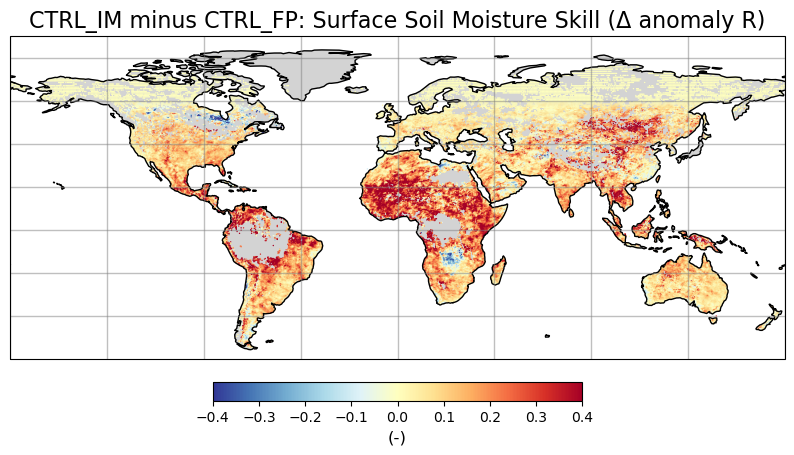

Mean:0.12248152989957214


In [7]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_OLv7_M36_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'CTRL_IM minus CTRL_FP: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

print("Mean:" + str(np.nanmean(Rdiff_vector)))

['unique_tilenum', 'num_obs', 'mean_obs_obs', 'mean_obs_fcst', 'mean_obs_ana', 'mean_obs_minus_fcst', 'mean_obs_minus_ana', 'std_obs_minus_fcst', 'std_obs_minus_ana', 'lon_tilenum', 'lat_tilenum']
 Saving figure as ASC_IM: Number of ASCAT Obs Assimilated.png 



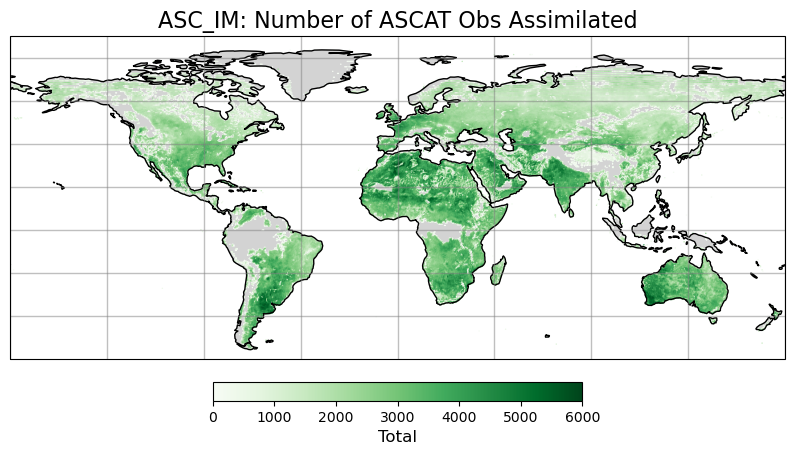

 Saving figure as ASC_IM: StdDev of OmF (SFDS).png 



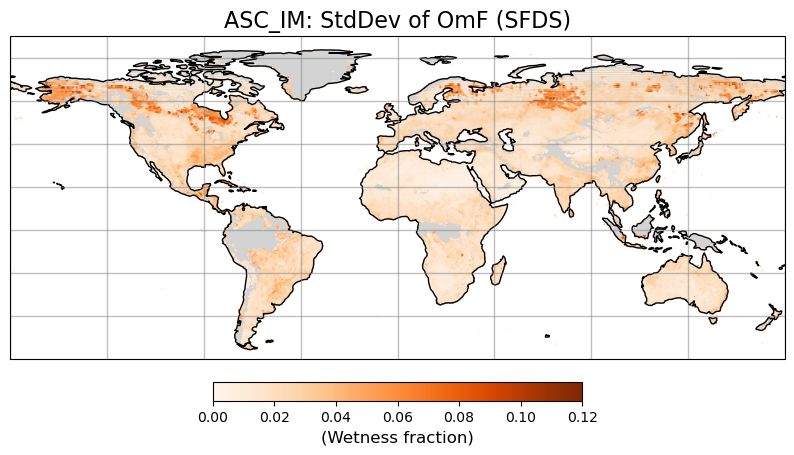

In [8]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data.files)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']
std_obs_minus_ana = data['std_obs_minus_ana']


obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

obarray[:, 0] = num_obs    
plot_global_tight(obarray,True,'ASC_IM: Number of ASCAT Obs Assimilated','Total', 0, 6000, cmap='Greens')

obarray[:, 0] = std_obs_minus_fcst    
plot_global_tight(obarray,True,'ASC_IM: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.12, cmap='Oranges')

 Saving figure as ASCAT_IM minus ASCAT_FP: Difference in StdDev of OmF (SFDS).png 



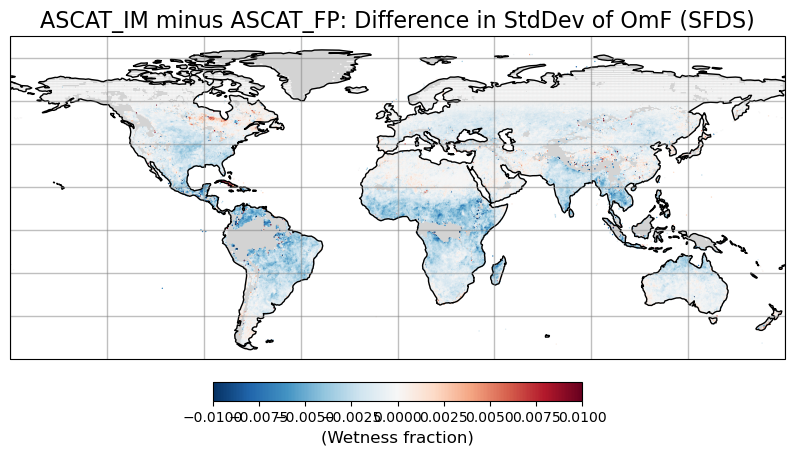

In [34]:

# Find the corresponding values in unique_tilenum_fp and their indices
mask = np.isin(unique_tilenum_fp, unique_tilenum)
corresponding_values = unique_tilenum_fp[mask]
corresponding_indices_fp = np.where(mask)[0]

# Find the corresponding values in unique_tilenum and their indices
corresponding_indices = np.where(np.isin(unique_tilenum, corresponding_values))[0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst[corresponding_indices] - std_obs_minus_fcst_fp[corresponding_indices_fp] 


obarray = np.empty([len(corresponding_indices), 3])

obarray[:, 1] = lon_tilenum[corresponding_indices]
obarray[:, 2] = lat_tilenum[corresponding_indices]

obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'ASCAT_IM minus ASCAT_FP: Difference in StdDev of OmF (SFDS)','(Wetness fraction)', -0.01, 0.01, cmap='RdBu_r')


 Saving figure as ASC_IM: StdDev of surface SM increment.png 



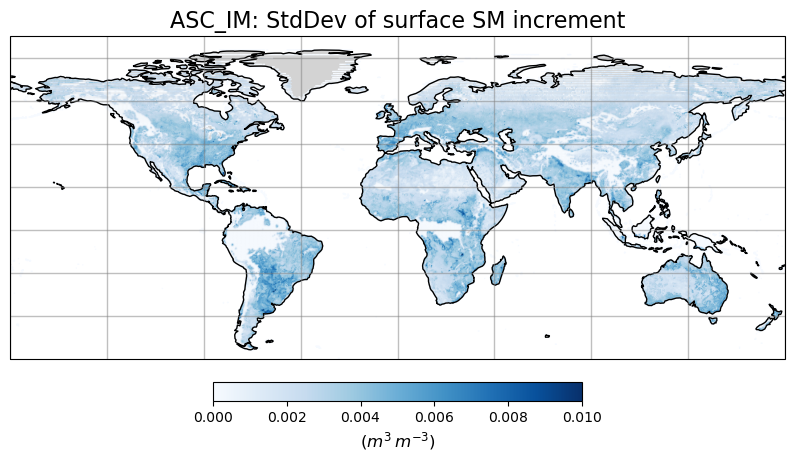

In [10]:
ds = xr.open_dataset('DAv7_M36.inst3_1d_lndfcstana_Nt.20150901.nc4')

lon = ds['lon']
lat = ds['lat']

n_tile = len(lat)

# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_increment_stats.npz' , allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']
std_rzmc_increment = data['std_rzmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,True,'ASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.01, cmap='Blues')

std_sfmc_increment_a = std_sfmc_increment

 Saving figure as ASCAT_IM minus ASCAT_FP: Difference in StdDev surface SM increment.png 



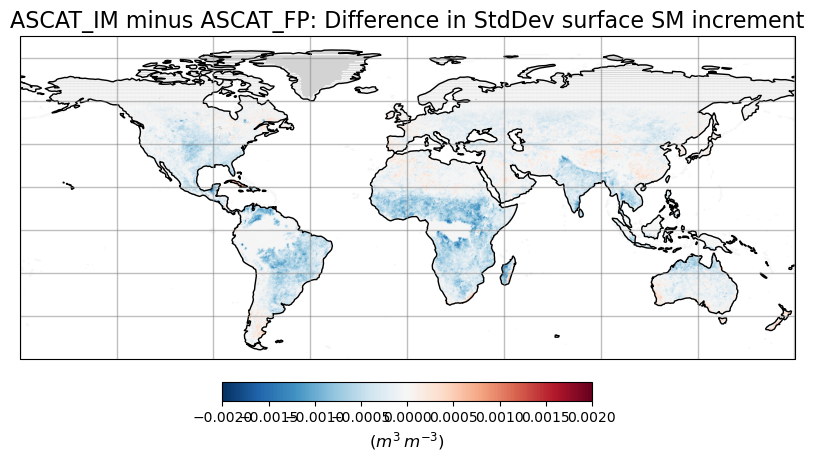

In [11]:
# Subtract the values
obarray[:, 0] = std_sfmc_increment - std_sfmc_increment_fp
plot_global_tight(obarray,True,'ASCAT_IM minus ASCAT_FP: Difference in StdDev surface SM increment','($m^3 \, m^{-3}$)', -0.002, 0.002, cmap='RdBu_r')

 Saving figure as ASCAT_IM minus CTRL_IM: Surface Soil Moisture Skill (Δ anomaly R).png 



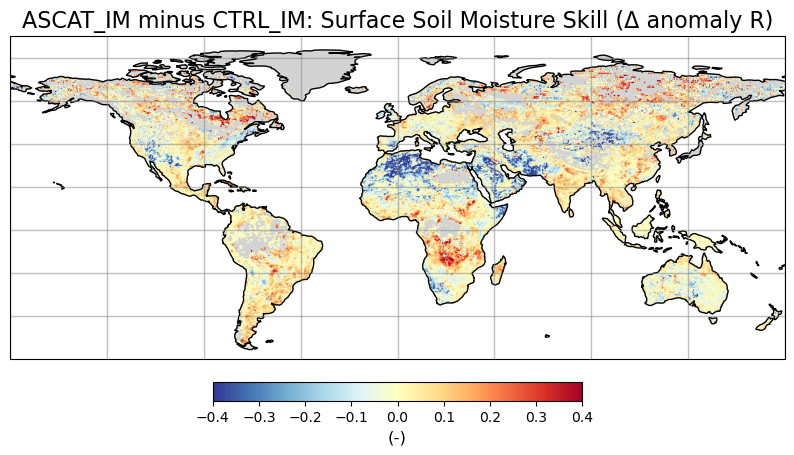

 Saving figure as |ASCAT_IM minus CTRL_IM| - |ASCAT_FP minus CTRL_FP|: Surface Soil Moisture Skill (Δ anomaly R).png 



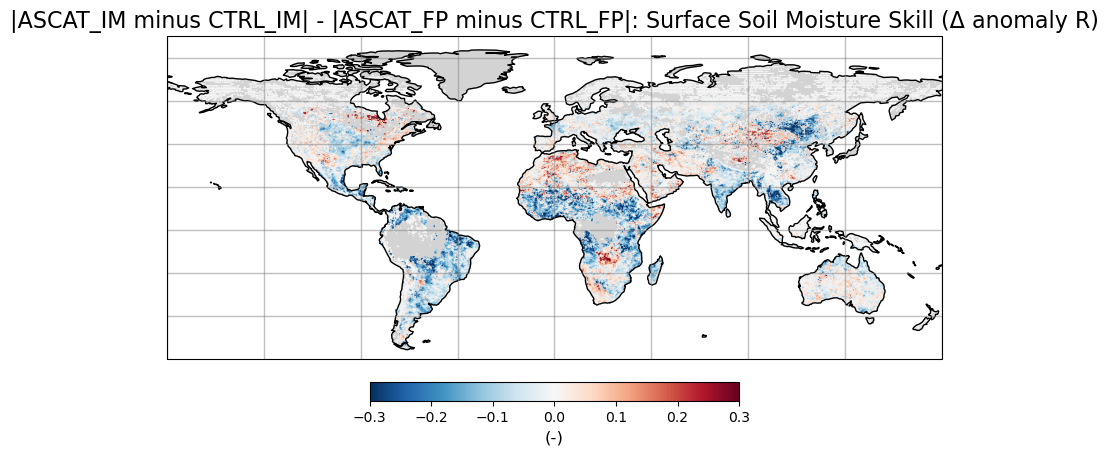

In [12]:
# Open .mat files

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_minus_OLv7_M36.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector = np.squeeze(data['Rdiff_vector'])
lons = np.squeeze(data['lons'])
lats = np.squeeze(data['lats'])

ob_array = np.empty([len(Rdiff_vector),3])
ob_array[:,1] = lons
ob_array[:,2] = lats
ob_array[:,0] = Rdiff_vector

# Plot the data
plot_global_tight(ob_array,True,'ASCAT_IM minus CTRL_IM: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.4, 0.4)

data = sio.loadmat('../test_data/AMS_24/IVs/Rdiff_DAv7ASCt2_M36_FPprcp_minus_OLv7_M36_FPprcp.mat')

# Get the data from the .mat file which contains 3 variables, Rdiff_vector, lons, lats
Rdiff_vector_fp = np.squeeze(data['Rdiff_vector'])

# Subtract the values
Rdiff_vector_diff = np.abs(Rdiff_vector) - np.abs(Rdiff_vector_fp)
ob_array[:,0] = Rdiff_vector_diff

# Plot the data
plot_global_tight(ob_array,True,'|ASCAT_IM minus CTRL_IM| - |ASCAT_FP minus CTRL_FP|: Surface Soil Moisture Skill (Δ anomaly R)','(-)', -0.3, 0.3, cmap='RdBu_r')

['unique_tilenum', 'num_obs_smap', 'num_obs_ascat', 'mean_obs_smap', 'mean_obs_ascat', 'mean_fcst_smap', 'mean_fcst_ascat', 'mean_ana_smap', 'mean_ana_ascat', 'mean_obs_minus_fcst_smap', 'mean_obs_minus_fcst_ascat', 'mean_obs_minus_ana_smap', 'mean_obs_minus_ana_ascat', 'std_obs_minus_fcst_smap', 'std_obs_minus_fcst_ascat', 'std_obs_minus_ana_smap', 'std_obs_minus_ana_ascat', 'lon_tilenum', 'lat_tilenum']
 Saving figure as SMPASC_IM: StdDev of OmF (Tb).png 



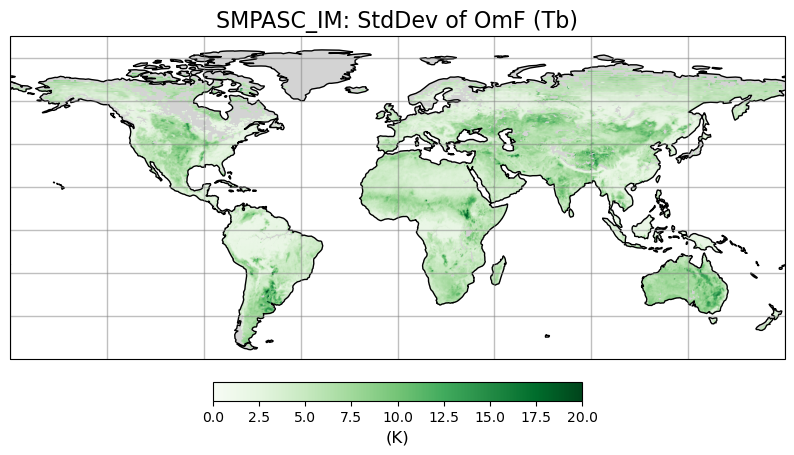

 Saving figure as SMPASC_IM: StdDev of OmF (SFDS).png 



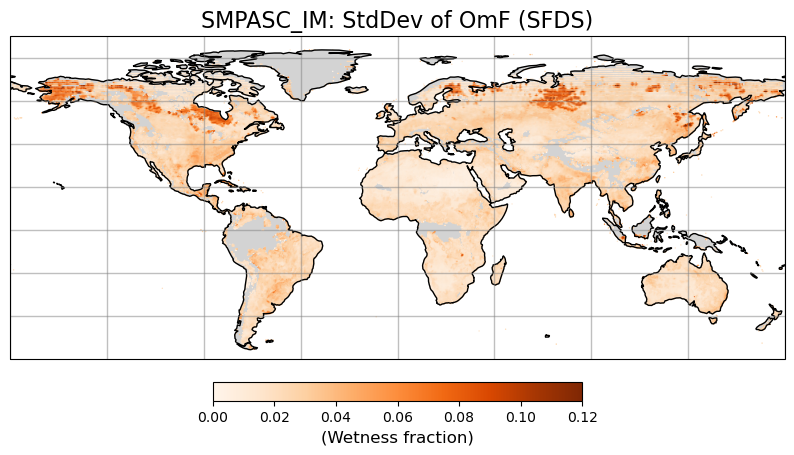

In [13]:
# Load the calculated values from the file
data2 = np.load('../test_data/AMS_24/smap_ascat_multivariate_test_obsfcstana_stats.npz', allow_pickle=True)

# list the variables in the file
print(data2.files)

unique_tilenum2 = data2['unique_tilenum']
num_unique_tilenum2 = len(unique_tilenum2)
lon_tilenum2 = data2['lon_tilenum']
lat_tilenum2 = data2['lat_tilenum']
num_obs2 = data2['num_obs_smap']
std_obs_minus_fcst_smap2 = data2['std_obs_minus_fcst_smap']
std_obs_minus_fcst_ascat2 = data2['std_obs_minus_fcst_ascat']

obarray2 = np.empty([num_unique_tilenum2, 3])
obarray2[:, 1] = lon_tilenum2
obarray2[:, 2] = lat_tilenum2

obarray2[:, 0] = std_obs_minus_fcst_smap2    
plot_global_tight(obarray2,True,'SMPASC_IM: StdDev of OmF (Tb)','(K)', 0, 20, cmap='Greens')

obarray2[:, 0] = std_obs_minus_fcst_ascat2    
plot_global_tight(obarray2,True,'SMPASC_IM: StdDev of OmF (SFDS)','(Wetness fraction)', 0, 0.12, cmap='Oranges')

 Saving figure as SMPASC_IM minus SMP_IM: Difference in StdDev of OmF (Tb).png 



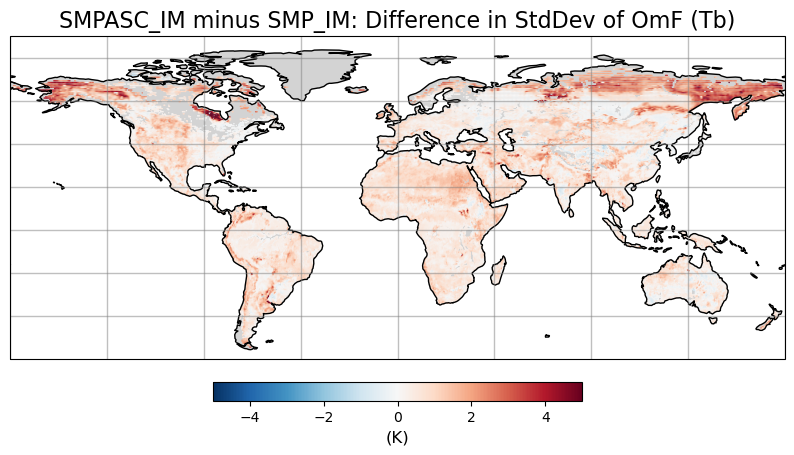

In [14]:
# Load the calculated values from the SMAP file
data = np.load('../test_data/AMS_24/DAv7_M36_obsfcstana_stats.npz', allow_pickle=True)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']

obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

# Subtract std_obs_minus_fcst2 from std_obs_minus_fcst using the unique_tilenum and unique_tilenum2 as the index

# Find the indices of the unique_tilenum2 in unique_tilenum
index = np.empty(num_unique_tilenum, dtype=int)
for i in range(num_unique_tilenum):
    index[i] = np.where(unique_tilenum2 == unique_tilenum[i])[0][0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst_smap2[index] - std_obs_minus_fcst

obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'SMPASC_IM minus SMP_IM: Difference in StdDev of OmF (Tb)','(K)', -5, 5, cmap='RdBu_r')

 Saving figure as SMPASC_IM minus ASC_IM: Difference in StdDev of OmF (SFDS).png 



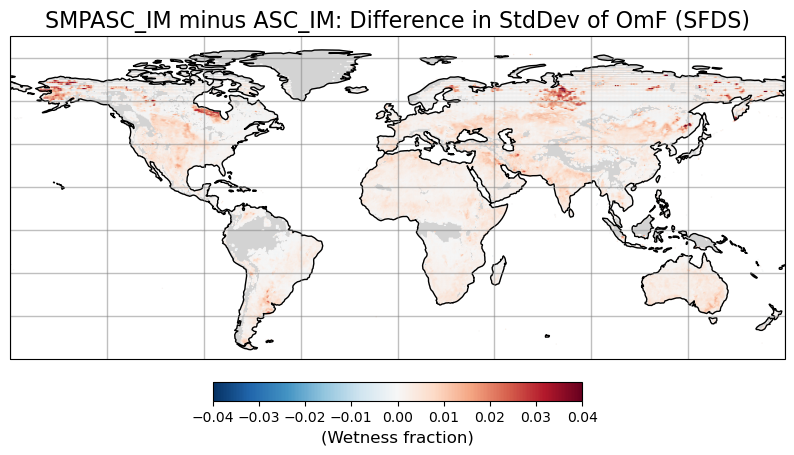

In [15]:
# Load the calculated values from the SMAP file
data = np.load('../test_data/AMS_24/DAv7_M36_ASCAT_type_2_obsfcstana_stats.npz', allow_pickle=True)

unique_tilenum = data['unique_tilenum']
num_unique_tilenum = len(unique_tilenum)
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']
num_obs = data['num_obs']
std_obs_minus_fcst = data['std_obs_minus_fcst']

obarray = np.empty([num_unique_tilenum, 3])
obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum

# Subtract std_obs_minus_fcst2 from std_obs_minus_fcst using the unique_tilenum and unique_tilenum2 as the index

# Find the indices of the unique_tilenum2 in unique_tilenum
index = np.empty(num_unique_tilenum, dtype=int)
for i in range(num_unique_tilenum):
    index[i] = np.where(unique_tilenum2 == unique_tilenum[i])[0][0]

# Subtract the values
std_obs_minus_fcst_diff = std_obs_minus_fcst_ascat2[index] - std_obs_minus_fcst


obarray[:, 0] = std_obs_minus_fcst_diff
plot_global_tight(obarray,True,'SMPASC_IM minus ASC_IM: Difference in StdDev of OmF (SFDS)','(Wetness fraction)', -0.04, 0.04, cmap='RdBu_r')

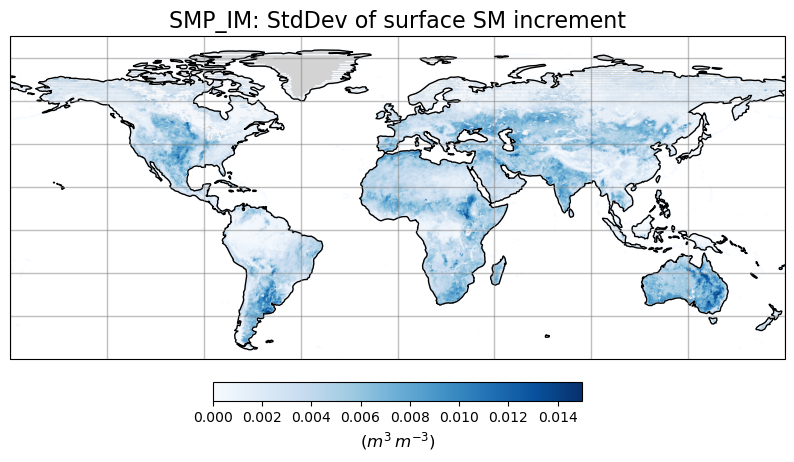

In [16]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/DAv7_M36_increment_stats.npz', allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,False,'SMP_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.015, cmap='Blues')

std_sfmc_increment_s = std_sfmc_increment

 Saving figure as SMPASC_IM: StdDev of surface SM increment.png 



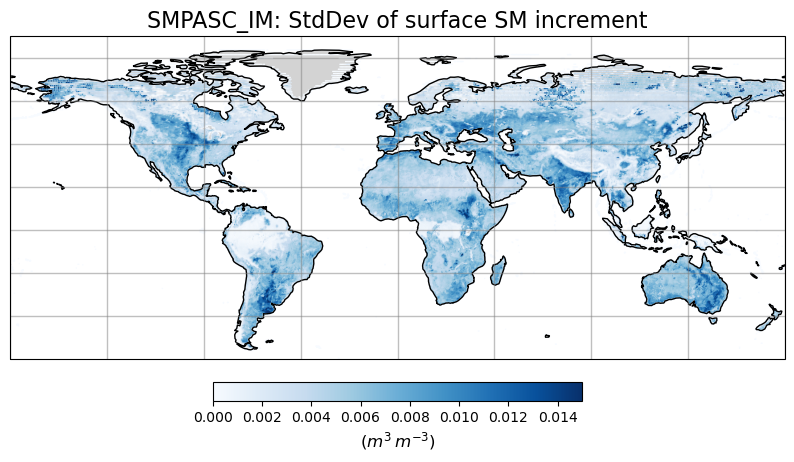

In [17]:
# Load the calculated values from the file
data = np.load('../test_data/AMS_24/smap_ascat_multivariate_test_increment_stats.npz', allow_pickle=True)

std_sfmc_increment = data['std_sfmc_increment']

obarray = np.empty([n_tile, 3])
obarray[:, 1] = lon
obarray[:, 2] = lat
obarray[:, 0] = std_sfmc_increment
    
plot_global_tight(obarray,True,'SMPASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', 0, 0.015, cmap='Blues')

std_sfmc_increment_sa = std_sfmc_increment


 Saving figure as SMPASC_IM minus SMP_IM: StdDev of surface SM increment.png 



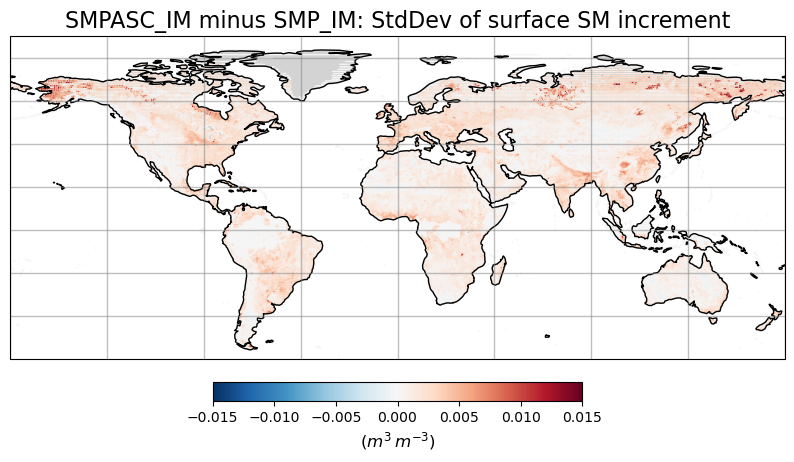

 Saving figure as SMPASC_IM minus ASC_IM: StdDev of surface SM increment.png 



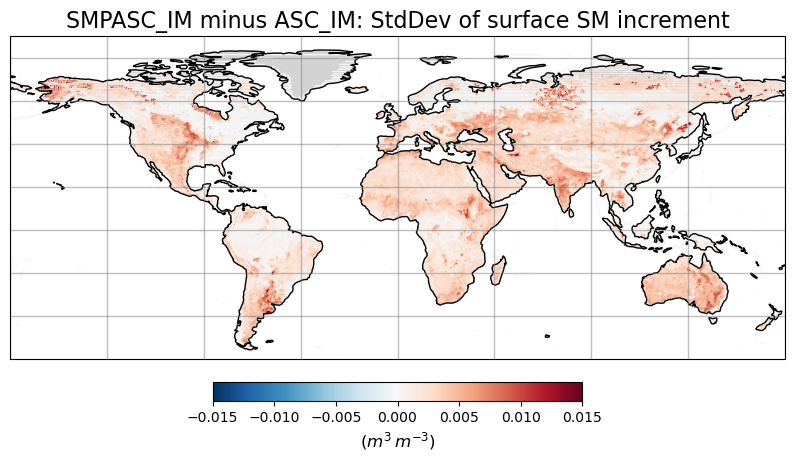

In [18]:
obarray[:, 0] = std_sfmc_increment_sa - std_sfmc_increment_s
    
plot_global_tight(obarray,True,'SMPASC_IM minus SMP_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', -0.015, 0.015, cmap='RdBu_r')

obarray[:, 0] = std_sfmc_increment_sa - std_sfmc_increment_a
    
plot_global_tight(obarray,True,'SMPASC_IM minus ASC_IM: StdDev of surface SM increment','($m^3 \, m^{-3}$)', -0.015, 0.015, cmap='RdBu_r')